<a href="https://colab.research.google.com/github/Ruthikajayaprakash/Google-playstore-Data-Analysis/blob/main/Google_Play_Store_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'google-playstore-apps:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F157336%2F2344679%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240905%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240905T011254Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1b7d6ba9866051bba9a3f00186c1ce70190f5879144e36eb3babfb4fe3ac448fa2f9e6c6f460ce9a0a541a568f1663c21249852407abea4406c5d68c1a5daee742f8a2a069bbda6d5efaf14c2f71179f4470c9f1fc96bfae49ed27799dac7562e0de45db3041c6416e9a65368c22f1806b4b65cd710fb4ca98dadca5c8015e60654b05b47f0df31a0f6333c77b6e1290c352875dddf1da890081605b3d95d6d29fb56819a58f8838f854595ad6e750ce91badb1d932f9ad5fe5c757500720ab8291533317a04c7715849c6d557fc54182c4616132c7b5999ed7aaa0d9a5bf30ec44260ede9f91c427a0a96ce7afc2fcb3cd9193793cb38e599312d60a4352b4c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 216781487 bytes downloaded
Downloaded and uncompressed: google-playstore-apps
Data source import complete.




**MetaData:**

This dataset, curated for data scientists, comprises information on over 600,000 applications. The dataset encompasses 23 attributes, including app name, category, rating, installs, pricing details, developer information, release dates, and more. It serves as a valuable resource for in-depth analysis and exploration in the domain of mobile applications.

 **Application Data Columns and Descriptions**

| Column            | Description                                                      |
|-------------------|------------------------------------------------------------------|
| App Name          | Name of the application.                                         |
| App Id            | Unique identifier for each application.                         |
| Category          | Categorization of the application.                              |
| Rating            | User rating of the application.                                  |
| Rating Count      | Number of user ratings received by the application.             |
| Installs          | Total number of installs for the application.                   |
| Minimum Installs  | Minimum number of installs required for the application.        |
| Maximum Installs  | Maximum number of installs achieved by the application.         |
| Free              | Indicates if the application is available for free.             |
| Price             | Cost of the application.                                        |
| Currency          | Currency used for pricing.                                      |
| Size              | Size of the application.                                        |
| Minimum Android   | Minimum Android version required to run the application.        |
| Developer Id      | Unique identifier for the application developer.                |
| Developer Website | Website of the application developer.                           |
| Developer Email   | Email contact of the application developer.                     |
| Released          | Date when the application was released.                         |
| Privacy Policy    | Availability of a privacy policy for the application.           |
| Last Updated      | Date when the application was last updated.                     |
| Content Rating    | Target audience for the application based on content.           |
| Ad Supported      | Indicates if the application has advertisements.                |
| In-app Purchases  | Indicates if the application offers in-app purchases.           |
| Editor Choice     | Designation if the application is an editor's choice.           |

**About the Dataset:**
This dataset contains information about more than 600,000 applications, providing various attributes for analysis and exploration.

## 2.1 Task:
Conduct a thorough Exploratory Data Analysis (EDA) on the Google Play Store dataset, focusing on data cleaning and normalization. Document observations during coding for informed decision-making. Produce a comprehensive summary for refining the dataset, aiding subsequent analytical tasks.

## 2.2 Objectives:
Uncover meaningful insights from the dataset to understand customer behaviors and preferences. Provide valuable guidance for developers and stakeholders to enhance app development strategies, ensuring success in the dynamic mobile app market..

## 2.3 Kernel Version Used:
- Python 3.11.0

## 3.0 **Import Libraries**

We will utilize the following libraries for our analysis:

1. **Pandas:** A powerful data manipulation and analysis library.
2. **NumPy:** A versatile numerical computing library.
3. **Matplotlib:** A data visualization library for creating static, interactive, and animated plots.
4. **Seaborn:** A statistical data visualization library that enhances Matplotlib's capabilities.
5. **SciPy:** Providing a comprehensive set of numerical algorithms and tools for scientific computing in Python.

These libraries are essential for conducting a thorough analysis and visualization of the dataset.


In [2]:
# Importing Libraries

import pandas as pd  # Data manipulation and analysis library
import numpy as np   # Numerical computing library

# Visualization Libraries
import matplotlib.pyplot as plt  # Data visualization library
import seaborn as sns            # Statistical data visualization library
%matplotlib inline

# Scientific and Statistical Computing
import scipy as sp

## 4.0  Data Loading, Exploration & Wrangling

### 4.1 Load the csv file with the pandas

In [3]:
# Set Pandas options to display all columns and rows

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
# Load the Dataset
pd.read_csv('/kaggle/input/google-playstore-apps/Google-Playstore.csv')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


### 4.2 DataFrame Creation

In [5]:
df = pd.read_csv('/kaggle/input/google-playstore-apps/Google-Playstore.csv')

### 4.3 Get a sneak peek of your data
Gain an immediate overview of your dataset with a concise line of code. This allows you to efficiently inspect the initial rows of your dataset, providing a snapshot of the data structure without the need to navigate through the entire file.

In [6]:
# View the first 5 rows
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


### 4.4 View the column names

In [7]:
# Display the column names
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

### 4.5 View the Shape of the Dataset

In [8]:
# View the number of rows and columns
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 2312944 rows and 24 columns


Not enough, let's have a look on the columns and their data types using detailed info function

In [9]:
# Display detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

### 4.6 Descriptive Statistics

Employing descriptive statistics to succinctly summarize and comprehend the fundamental features of the dataset.


In [10]:
# Display descriptive statistics for numerical columns
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


### Descriptive Statistics Observations -1

1. **Rating Diversity:**
   - Ratings vary from 0 to 5, showcasing diverse user opinions on app quality.

2. **User Engagement Range:**
   - 'Rating Count' spans from 0 to 138,557,600, indicating varying app popularity.

3. **Installation Metrics Spectrum:**
   - 'Minimum' and 'Maximum Installs' reflect a wide range, from 0 to 5 billion, highlighting diverse app popularity.

4. **Pricing Landscape:**
   - Most apps are free (75% with a price of 0), but premium-priced apps exist, reaching a max of 399.99.

### Numeric Considerations

   - **Observation 1:** 'Size' and 'Installs' columns may contain non-numeric characters ('M', 'K', '+'). Transforming them into numeric formats is crucial for accurate numerical operations.


### 4.7 Handling Missing Values


In [11]:
# Code to check and display the count of missing values in each column, sorted in descending order
df.isnull().sum().sort_values(ascending=False)

,0
Developer Website,760835
Privacy Policy,420953
Released,71053
Rating,22883
Rating Count,22883
Minimum Android,6530
Size,196
Currency,135
Installs,107
Minimum Installs,107


## **5.0 Comprehensive Exploratory Analysis and Visual Insights**

### 5.1 Visualizing Null Values




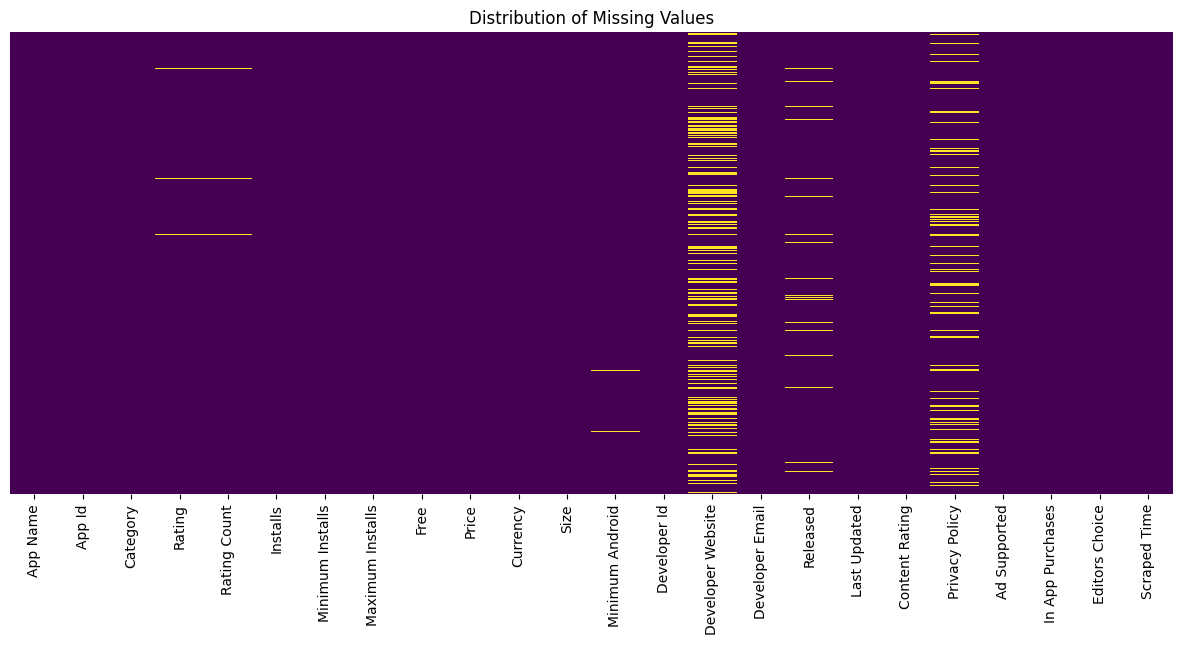

In [12]:
# Create a heatmap to visualize missing values
plt.rcParams['figure.figsize'] = (15,6)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Distribution of Missing Values")
plt.show()

> **Figure-1:** Visualization depicting the distribution of missing values in the 'df' DataFrame.


#### Simplify Missing Data Analysis

1. **What it Does:**
   - Use this code snippet to understand how much data is missing in your dataset.

2. **Easy Sorting:**
   - See the percentage of missing values for each feature, sorted from lowest to highest.

3. **Identify Priority Areas:**
   - Quickly spot which features have the most missing data for targeted attention.

4. **User-Friendly Tool:**
   - A straightforward way to grasp and address missing data in your dataset.


In [14]:
#df.isnull().sum()/len(df)*100
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

,0
Developer Website,32.894657
Privacy Policy,18.199879
Released,3.071972
Rating,0.989345
Rating Count,0.989345
Minimum Android,0.282324
Size,0.008474
Currency,0.005837
Installs,0.004626
Minimum Installs,0.004626


,0
Developer Website,32.894657
Privacy Policy,18.199879
Released,3.071972
Rating,0.989345
Rating Count,0.989345
Minimum Android,0.282324
Size,0.008474
Currency,0.005837
Installs,0.004626
Minimum Installs,0.004626


### 5.2 Visualizing Null Values Percentage





<ipython-input-15-c6abb34c840f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentage.index, y=null_percentage, palette="viridis")  # You can change the color palette if needed


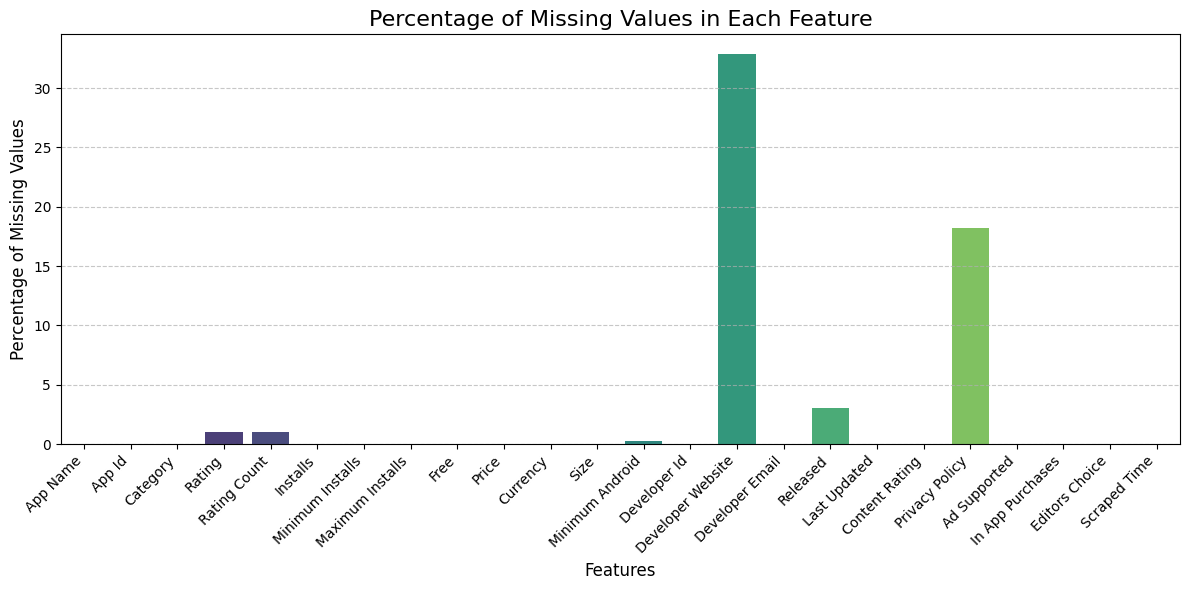

In [15]:
# Calculate the percentage of null values for each feature
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar plot to visualize the null values percentage
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.index, y=null_percentage, palette="viridis")  # You can change the color palette if needed
plt.title("Percentage of Missing Values in Each Feature", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Percentage of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better visualization
plt.tight_layout()  # Adjust layout for better readability
plt.show()


> **Figure-2:**Visualization illustrating the distribution of percentage missing values in the 'df' DataFrame.


#### Observation Set 2:
> Dealing with the null values
- *Developer Website* has the highest percentage of null values (32.61%).
- *Privacy Policy* shows significant null values (17.91%).
- *Released* has approximately 2.90% null values.
- *Rating* and *Rating Count* both have 0.91% null values.
- *Minimum Android* has 0.30% null values.
- *Installs*, *Minimum Installs*, and *Currency* have very low null values (around 0.01%).
- Remaining features (*Developer Email, Editors Choice, In App Purchases, Ad Supported, Content Rating, Last Updated, Scraped Time, Developer Id, Size, Price, Free, Maximum Installs, Category, App Id, App Name*) have extremely low null values (less than 0.01%).


### 5.3 Expert Approaches to Address Missing Values




#### Decision: Removal of Feature
 - The removed columns, including *Developer Website*, *Privacy Policy*, *Developer Email*, In *App Purchases*, *Editors Choice*, *Ad Supported*, and *Scraped Time*, exhibited a combination of high null percentages and limited relevance to the primary goals of the Google Play Store EDA. These features, deemed non-critical for the specified analysis, may not contribute substantially to understanding user behavior or app performance. The decision to remove these columns was driven by the aim of conducting a more focused and meaningful EDA, enhancing the quality of insights gained from the dataset.



In [16]:
# Columns to remove
columns_to_remove = ['Developer Website', 'Privacy Policy', 'Developer Email',
                      'In App Purchases', 'Editors Choice', 'Ad Supported', 'Scraped Time']

# Drop the specified columns in-place
df.drop(columns=columns_to_remove, axis=1, inplace=True)

df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone


#### Decision: Imputation in Released Column
- For the 'Released' column, essential for app release dates, we've chosen to fill missing values using the mode.
- The mode, representing the most frequent date, is a suitable choice for categorical date data.
- This ensures that we replace missing values with the most common release date, maintaining data completeness.

In [17]:
# Impute missing values in 'Released' column with the mode
released_mode = df['Released'].mode()[0]
df['Released'].fillna(released_mode, inplace=True)

#### Decision: Imputation in Rating' and Rating Count Column
- To address missing values in 'Rating' and 'Rating Count,' we use the median for accuracy, considering the middle value to match the existing data pattern. This method balances extreme values, ensuring reliable results.

In [18]:
# Impute missing values in 'Rating' and 'Rating Count' columns with the median
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Rating Count'].fillna(df['Rating Count'].median(), inplace=True)

In [19]:
df.isnull().sum().sort_values(ascending=False)

,0
Minimum Android,6530
Size,196
Currency,135
Installs,107
Minimum Installs,107
Developer Id,33
App Name,5
Last Updated,0
Released,0
Free,0


#### Decision: Convert 'Installs' to Numeric and Impute Missing Values

- Converted the 'Installs' column to numeric format by removing the '+' sign, ensuring accurate representation of numerical values for app installations.
- Employed the median to fill missing values in the 'Installs', 'Minimum Installs', and 'Maximum Installs' columns.
- The median, less influenced by extreme values, ensures a robust imputation strategy, crucial in columns like 'Installs' with widely varying app popularity.
- Imputing with the median preserves the original distribution of app installation data, essential for accurate analysis in the 'Installs' columns.

In [20]:
# Convert categorical values to numeric for 'Installs' column if it's in object format
if df['Installs'].dtype == 'object':
    df['Installs'] = df['Installs'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Replace NaN values with 0
df['Installs'].fillna(0, inplace=True)

# Convert to integer
df['Installs'] = df['Installs'].astype(int)


In [21]:

# Check the data type of 'Minimum Installs' and convert if needed
if df['Minimum Installs'].dtype == 'object':
    df['Minimum Installs'] = df['Minimum Installs'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Check the data type of 'Maximum Installs' and convert if needed
if df['Maximum Installs'].dtype == 'object':
    df['Maximum Installs'] = df['Maximum Installs'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Impute missing values with median
df['Installs'].fillna(df['Installs'].median(), inplace=True)
df['Minimum Installs'].fillna(df['Minimum Installs'].median(), inplace=True)
df['Maximum Installs'].fillna(df['Maximum Installs'].median(), inplace=True)


- Let's verify if the dtypes has been changes and the `+` and `,` sign has been removed.


#### New Column: 'Installs_category'

In [22]:
df['Installs'].value_counts()

,count
Installs,
100,443368
1000,398199
10,300156
10000,256723
500,189077
50,170465
5000,143593
100000,110257
50000,75359


- We can generate a new columns based on the installation values, which will be helpful in our analysis.

In [23]:
df['Installs'].max() # this will show the value counts of the column

10000000000

In [24]:
# Define corrected bins and labels
bins = [0, 100, 1000, 10000, 50000, 100000, 500000, 1000000, 1000000000, 5000000000]
labels = ['No', 'Very Low', 'Low', 'Moderate', 'More than Moderate', 'High', 'Very High', 'Top Notch', 'Super High']

# Categorize the 'Installs' column into different categories
df['Installs_Category'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

In [25]:
df['Installs_Category'].value_counts()

,count
Installs_Category,
Very Low,632445
No,621411
Low,541792
Moderate,256723
High,110257
More than Moderate,75359
Top Notch,47875
Very High,27012
Super High,55


#### Decision:Convert 'Size' to numeric
- in Observation 1: we observed that 'Size' ' columns  contain non-numeric characters ('M','K', 'Varies with device', ).So lets check size columns.

In [26]:
df['Size'].value_counts()

,count
Size,
Varies with device,74777
11M,62157
12M,56080
13M,48034
14M,45211
...,...
8.7k,1
784M,1
385M,1


#### **Observations - 3** :
We observed that There are several unique values in the `Size` column. The initial process involves standardizing the units to a common format, converting kilobytes (kbs) into megabytes ('M'). Additionally, any instances of "varies with device" are to be replaced with null values.

1. "Veries with device"
2. M
3. K

> Let's convert the `Kbs` units into megabytes and replace `Varies with device` with NaN values.

In [27]:
def convert_to_mb(size):
    if isinstance(size, str):
        # Remove commas from the string
        size = size.replace(',', '')

        if 'k' in size:
            # Remove 'k' and convert to MB (1 MB = 1024 KB)
            size = float(size.replace('k', '')) / 1024
        elif 'M' in size:
            # Remove 'M' (already in MB)
            size = float(size.replace('M', ''))
        elif 'Varies with device' in size:
            return np.nan

    return size

In [28]:
df['Size'] = df['Size'].apply(convert_to_mb)

#### New Column: 'Size_in_Mb'

In [29]:
# Rename the column 'Size' to 'Size_in_Mb'
df.rename(columns={'Size': 'Size_in_Mb'}, inplace=True)

In [30]:
df['Size_in_Mb'] = pd.to_numeric(df['Size_in_Mb'], errors='coerce')

In [31]:
df['Size_in_Mb'].value_counts()

,count
Size_in_Mb,
11.000000,62157
12.000000,56080
13.000000,48034
14.000000,45211
16.000000,42474
...,...
784.000000,1
385.000000,1
0.007422,1


#### Decision: Drop Missing Values in Remaining Columns

Dropping missing values ensures data completeness, integrity, and analytical accuracy. It helps maintain essential columns with complete information, reduces the risk of biased results, and ensures reliable data for accurate analysis and decision-making.

In [32]:
# Drop all missing values in specific columns
df.dropna(subset=['Minimum Android', 'Content Rating', 'Currency', 'Last Updated','App Name','Developer Id'], inplace=True)


In [33]:
df.dropna(subset=['Installs_Category'],inplace=True)

- Lets Check again missing values.

In [34]:
df.isnull().sum()

,0
App Name,0
App Id,0
Category,0
Rating,0
Rating Count,0
Installs,0
Minimum Installs,0
Maximum Installs,0
Free,0
Price,0



#### **Observations - 4**
- Only `Size_in_Mb` columns are left with missing values.
- In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.


#### Milestone 1: We've removed almost all the empty spots in the dataset.✔️

> Next: Identify and Validate Duplications

### 5.4 Finding and Verifying Duplicate Entries





In [35]:
# Find duplicates in the data
df.duplicated().sum()

0

In [36]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size_in_Mb', 'Minimum Android', 'Developer Id', 'Released',
       'Last Updated', 'Content Rating', 'Installs_Category'],
      dtype='object')

- This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [37]:
# Find the duplicate in 'App Name' column
df['App Name'].duplicated().sum()

134583

In [38]:
df['App Name'].value_counts().sort_values(ascending=False)

,count
App Name,
Tic Tac Toe,382
Calculator,260
Flashlight,256
BMI Calculator,199
Age Calculator,190
...,...
CFG Business Mobile Banking,1
Hema Cüzdan,1
Slash of Monster - Timing Attack,1


> From the above cell output we can see that App Name column has multiple rows. Let's check out that data in those rows is identical or not

In [39]:
df[df['App Name'] == 'Tic Tac Toe']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size_in_Mb,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Installs_Category
3918,Tic Tac Toe,com.dev.atte.tic_tac_toe,Puzzle,0.0,0.0,10,10.0,30,True,0.0,USD,3.400000,4.0 and up,ATTE AKA FRANCOIS,"May 18, 2018","May 18, 2018",Everyone,No
13758,Tic Tac Toe,com.md.tictactoe,Board,0.0,0.0,10,10.0,31,True,0.0,USD,34.000000,4.3 and up,Smart Digital Tools,"Nov 2, 2020","Nov 18, 2020",Everyone,No
25351,Tic Tac Toe,com.sthirumuru.tictactoenew,Board,4.2,11.0,5000,5000.0,6379,True,0.0,USD,7.400000,7.0 and up,Sundeep Reddy Thirumuru,"Apr 13, 2021","Jun 03, 2021",Everyone,Low
28142,Tic Tac Toe,com.fsk00x.TicTacToe,Board,0.0,0.0,500,500.0,922,True,0.0,USD,8.600000,4.1 and up,SteadFast Games,"Feb 13, 2020","Feb 13, 2020",Everyone,Very Low
30962,Tic Tac Toe,net.snatchdreams.tictactoe,Puzzle,0.0,0.0,10,10.0,38,True,0.0,USD,0.905273,4.0 and up,SnatchDreams,"Jul 16, 2017","Oct 16, 2019",Everyone,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272773,Tic Tac Toe,com.tictactoe.MobileAppsPro,Board,3.8,9269.0,500000,500000.0,800662,True,0.0,USD,2.300000,2.3 and up,Mobile Apps Pro,"Jan 9, 2015","May 20, 2015",Everyone,Very High
2281376,Tic Tac Toe,com.erjainam.tictactoe.release,Board,0.0,0.0,50,50.0,50,True,0.0,USD,3.500000,5.0 and up,Jainam Jhaveri,"Sep 2, 2018","Sep 02, 2018",Everyone,No
2282023,Tic Tac Toe,com.swapworld.tic_tac_toe,Board,4.7,7.0,10,10.0,34,True,0.0,USD,5.300000,4.1 and up,Cybertron's Hogwarts,"Sep 4, 2019","Sep 17, 2019",Everyone,No
2299121,Tic Tac Toe,com.infuse.tictactoe,Board,4.8,20.0,100,100.0,462,True,0.0,USD,2.100000,2.2 and up,Infuse Apps,"Jan 18, 2015","Jan 18, 2015",Everyone,Very Low


#### Milestone 2: *Hence no duplicates found* 👥

1. The dataset contains multiple records for the same App_name, indicating potential duplications within this field.
2. However, it's crucial to note that despite potential duplications in App_name, each record is unique when considering the dataset as a whole.
3. Each record may differ in terms of version numbers, App_Ids, and release dates, contributing to their uniqueness.
4. The duplicates within the App_name field do not represent exact replicas but rather distinct entries with varying attributes.
5. The presence of duplicates enhances the dataset's richness and comprehensiveness rather than diminishing its quality.

### 5.5 Exploring Numerical Attributes in the Dataset: An In-depth Analysis

In [40]:
df.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size_in_Mb
count,2.306226e+06,2.306226e+06,2.306226e+06,2.306226e+06,2.306226e+06,2.306226e+06,2.231445e+06
mean,2.211959e+00,2.581917e+03,1.482791e+05,1.482791e+05,2.688017e+05,1.033705e-01,1.917487e+01
std,2.096921e+00,1.427638e+05,5.833496e+06,5.833496e+06,1.183836e+07,2.635004e+00,2.382814e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.125000e-03
25%,0.000000e+00,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.000000e+00,4.900000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,5.000000e+02,6.970000e+02,0.000000e+00,1.000000e+01
75%,4.300000e+00,4.100000e+01,5.000000e+03,5.000000e+03,7.378000e+03,0.000000e+00,2.500000e+01
max,5.000000e+00,1.202062e+08,1.000000e+09,1.000000e+09,4.764329e+09,4.000000e+02,1.020000e+03


In [41]:
df['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, 2.9, 1.5, 3.5, 1.3, 2.8, 3. , 2.2, 1.8, 1.2, 1.9, 1.7, 1.4,
       1.6, 1. , 1.1])

In [46]:
df['Installs'].unique()

array([        10,       5000,         50,        100,       1000,
              500,      50000,      10000,          1,     500000,
           100000,          5,   10000000,    1000000,    5000000,
                0,  100000000,   50000000, 1000000000,  500000000])

In [47]:
df['Minimum Installs'].unique()

array([1.e+01, 5.e+03, 5.e+01, 1.e+02, 1.e+03, 5.e+02, 5.e+04, 1.e+04,
       1.e+00, 5.e+05, 1.e+05, 5.e+00, 1.e+07, 1.e+06, 5.e+06, 0.e+00,
       1.e+08, 5.e+07, 1.e+09, 5.e+08])

In [48]:
df['Maximum Installs'].unique()

array([     15,    7662,      58, ...,  590469, 7274660,  814548])

In [49]:
df['Price'].nunique()

1061

In [50]:
df['Size_in_Mb'].unique()

array([1.000e+01, 2.900e+00, 3.700e+00, ..., 4.050e+02, 3.125e-03,
       5.120e+02])

### 5.6 Defining App Types: Free vs. Paid - Classification Process
Utilizing the 'Free' Column for Enhanced Data Readability in Distinguishing between Paid and Free Apps.





In [51]:
df['Free'].unique()

array([ True, False])

In [52]:
# Create a new column 'App Type' based on the 'Free' column
df['App Type'] = df['Free'].apply(lambda x: 'Free' if x else 'Paid')
# Drop the original 'Free' column
df.drop(columns=['Free'], inplace=True)

In [53]:
df['App Type'].value_counts()

,count
App Type,
Free,2261571
Paid,44655


In [54]:
df.sample(6)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size_in_Mb,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Installs_Category,App Type
486003,Drum Tuning Calculator,com.overtone.tunebot,Music & Audio,4.0,351.0,500000,500000.0,508076,0.0,USD,23.0,4.0.3 and up,"Overtone Labs, Inc.","Apr 12, 2014","Jan 02, 2019",Everyone,Very High,Free
322936,VR5 Beta,io.pureid.vr5.beta,Productivity,0.0,0.0,10,10.0,39,0.0,USD,6.0,6.0 and up,PureID Labs,"Feb 28, 2021","Apr 15, 2021",Everyone,No,Free
129367,BSG Forschungszentrum Jülich,de.appack.project.bsg1963,Health & Fitness,0.0,0.0,50,50.0,79,0.0,USD,16.0,5.0 and up,vmapit.de,"Aug 6, 2020","Aug 06, 2020",Teen,No,Free
757643,Pelet Cinta Super Ampuh Tanpa Puasa,com.Peletcintasuperampuhtanpapuasa.depelopetre...,Books & Reference,0.0,0.0,1000,1000.0,1450,0.0,USD,4.2,4.0.3 and up,Depelope Trending Jaya,"Jun 29, 2019","May 26, 2020",Everyone,Low,Free
1555414,Grapes App,com.grapes.android.mobile,Communication,0.0,0.0,100,100.0,103,0.0,USD,11.0,4.3 and up,Grapes App,"Nov 24, 2020","Mar 26, 2021",Everyone,Very Low,Free
187214,No Crop for Instagram Story,com.nocrop.for.instagram.story,Social,0.0,0.0,100,100.0,431,0.0,USD,8.5,4.2 and up,Harry Studio,"Sep 7, 2020","Sep 07, 2020",Teen,Very Low,Free


### 5.7 Reviewing Content Ratings Data


In [55]:
df['Content Rating'].value_counts()

,count
Content Rating,
Everyone,2016076
Teen,195965
Mature 17+,60133
Everyone 10+,33764
Unrated,154
Adults only 18+,134


#### Observation Set 6:     
1. we have various Categories in the content Rating column :    
- Everyone
- Teen
- Mature 17+
- Everyone 10+
- Adults only 18+
- Unrated             

Now, we makes these categories to a simple 4 readable  Categories for better understanding :     
   Children, Teens, Adults & Everyone
    
    'Everyone': 'Everyone',
    'Teen': 'Teen',
    'Mature 17+': 'Adults',
    'Everyone 10+': 'Children',
    'Adults only 18+': 'Adults',
    'Unrated': 'Everyone'

- Presenting the content of the coulumn in Ascending order 'Children', 'Teens', 'Everyone', 'Adults'

In [56]:
category_mapping = {
    'Everyone': 'Everyone',
    'Teen': 'Teen',
    'Mature 17+': 'Adults',
    'Everyone 10+': 'Children',
    'Adults only 18+': 'Adults',
    'Unrated': 'Everyone'
}

# Map the categories using the dictionary
df['Content Rating'].replace(category_mapping, inplace=True)

In [57]:
df['Content Rating'].value_counts()

,count
Content Rating,
Everyone,2016230
Teen,195965
Adults,60267
Children,33764


In [58]:
df.isnull().sum()

,0
App Name,0
App Id,0
Category,0
Rating,0
Rating Count,0
Installs,0
Minimum Installs,0
Maximum Installs,0
Price,0
Currency,0


- Drop missing values in `Size_in_Mb`

In [59]:
df.dropna(subset=['Size_in_Mb'],inplace=True)

In [60]:
df.isnull().sum()

,0
App Name,0
App Id,0
Category,0
Rating,0
Rating Count,0
Installs,0
Minimum Installs,0
Maximum Installs,0
Price,0
Currency,0


## 6.0 Exploratory Data Analysis (EDA) Questions and Answers:             
> We are going to pose the following questions against the dataset:

1. What are the top 10 Categories with the highest number of installations on the Google Play Store?
2. Which category has the highest average rating?
3. What is the average price of apps in each category?
4. What are the Top 10 app producing developer?
5. What is the most common Android version among the top-rated apps?
6. What are the top 10 most installed apps?
7. Identify the top 5 Paid Apps on the Google Play Store with the highest user ratings.
8. Identify the top 5 Free Apps on the Google Play Store with the highest user ratings.
9. Conduct a Year-on-Year comparison of apps per Content_Rating on the Google Play Store.
10. Years in which max apps were released.
11. Examine the relationship between user ratings and app prices on the Google Play Store.
12. Are there any correlations between the size of the app and its rating count?
13. Year on Year break down of top-5 Genre based on App Price

**Question 1.What are the top 10 Categories with the highest number of installations on the Google Play Store?**


In [61]:
top_10_categories_df = df.groupby('Category')['Installs'].sum().nlargest(10).reset_index()
print(top_10_categories_df)

        Category     Installs
0          Tools  27301097507
1         Casual  14182166717
2         Action  14149920538
3         Arcade  13131824445
4  Entertainment  11290658238
5   Productivity  10590097186
6     Simulation  10457684072
7         Puzzle   9645991936
8    Photography   9464693977
9  Music & Audio   8404529937


<ipython-input-62-84251490bb6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_categories_df, x='Category', y='Installs', palette="viridis")


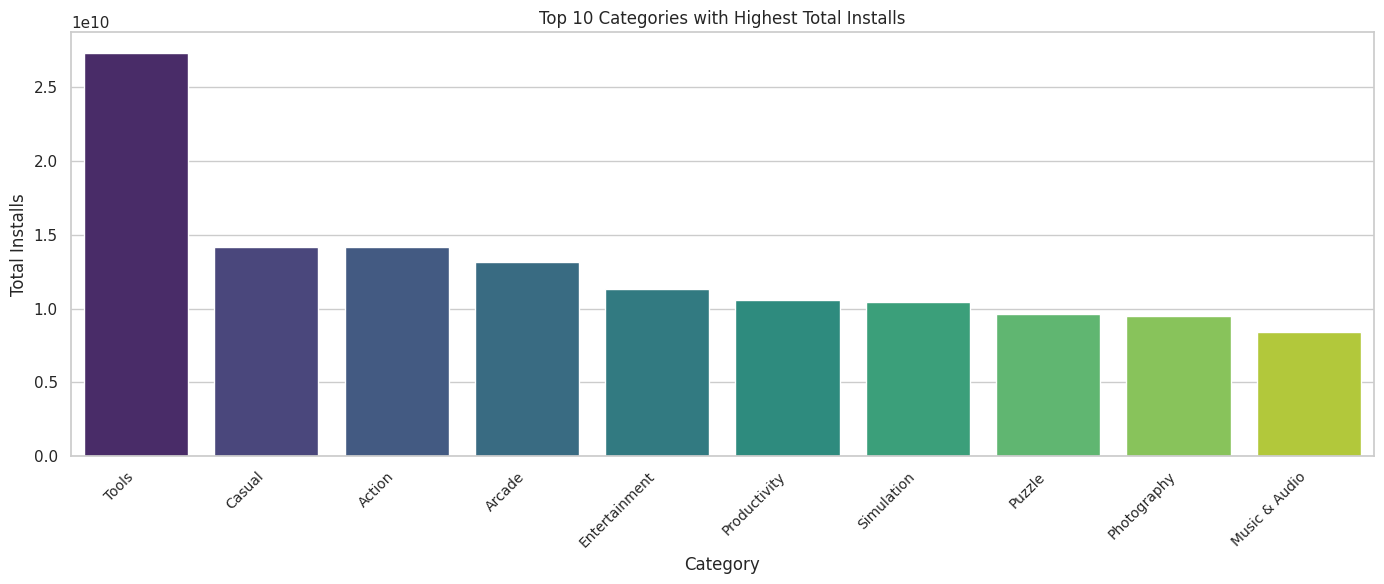

In [62]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_10_categories_df, x='Category', y='Installs', palette="viridis")
plt.ylabel('Total Installs')
plt.xlabel('Category')
plt.title('Top 10 Categories with Highest Total Installs')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


> **Figure-3:** Shows the Top 10 Categories that are installed from the Google Play Store

- Answer 1: Tools Apps are the most downloaded apps from the store

**Question 2. Which category has the highest average rating?**


In [63]:
# Category with highest average Rating
top_10_categories_highest_avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
# Print the result
print(top_10_categories_highest_avg_rating)


Category
Role Playing               3.374645
Casino                     3.246973
Simulation                 3.196822
Weather                    3.075280
Card                       3.038601
Racing                     2.935173
Video Players & Editors    2.882901
Word                       2.877783
Strategy                   2.855802
Comics                     2.828030
Name: Rating, dtype: float64


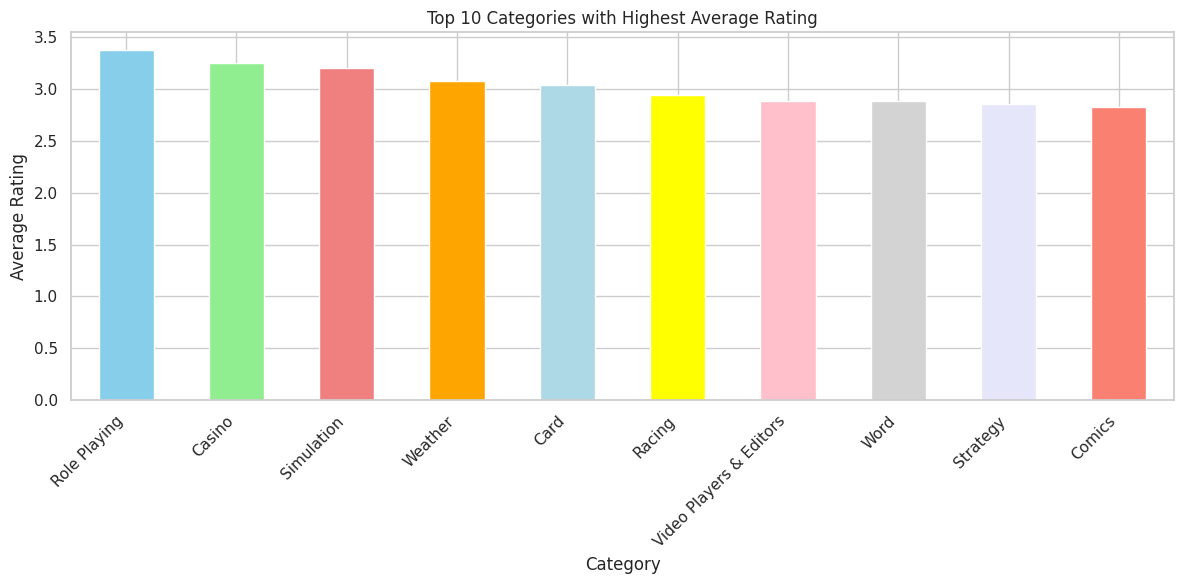

In [64]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightblue', 'yellow', 'pink', 'lightgrey', 'lavender', 'salmon']
top_10_categories_highest_avg_rating.plot(kind='bar', color=colors)
plt.title('Top 10 Categories with Highest Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> **Figure-4:** Top 10 Categories with Highest Average Rating

- Answer 2: Based on highest average rating the highest top 10 rated Category Role Playing , Casino, Simulation , Card , Wheather, Racing etc            

 **Question 3. What is the average price of apps in each category?**

In [65]:
# Group by category and calculate the mean price
average_price_by_category = df.groupby('Category')['Price'].mean().reset_index()

# Print the average price of apps in each category
print(average_price_by_category)


                   Category     Price
0                    Action  0.067059
1                 Adventure  0.181308
2                    Arcade  0.098922
3              Art & Design  0.089198
4           Auto & Vehicles  0.119539
5                    Beauty  0.005235
6                     Board  0.169187
7         Books & Reference  0.191775
8                  Business  0.055539
9                      Card  0.125069
10                   Casino  0.075312
11                   Casual  0.048667
12                   Comics  0.051192
13            Communication  0.042733
14                   Dating  0.087931
15                Education  0.161070
16              Educational  0.166456
17            Entertainment  0.051190
18                   Events  0.002938
19                  Finance  0.051140
20             Food & Drink  0.019930
21         Health & Fitness  0.093357
22             House & Home  0.018056
23         Libraries & Demo  0.038718
24                Lifestyle  0.075538
25        Ma

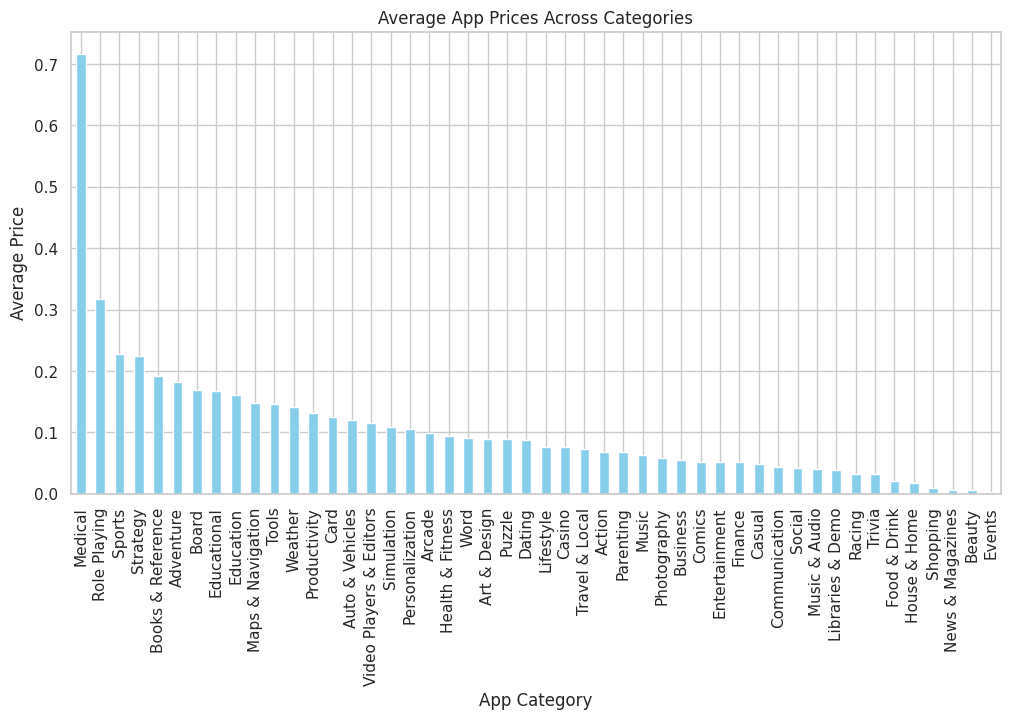

In [66]:
# Calculate the average price of apps in each category using groupby
average_price_by_category = df.groupby('Category')['Price'].mean()

# Plotting the average prices across categories
plt.figure(figsize=(12, 6))
average_price_by_category.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('App Category')
plt.ylabel('Average Price')
plt.title('Average App Prices Across Categories')
plt.show()



> **Figure-5:** Average App Prices Across Categories

- Answer 3:The average price of apps varies across different categories, with some categories like Medical having a significantly higher average price compared to others like Beauty, which have a much lower average price.

 **Question 4. What are the Top 10 app producing developer?**

In [67]:
# Count the number of apps produced by each developer
top_10_developers = df['Developer Id'].value_counts().head(10)

# Print the result
print("Top 10 app-producing developers:")
print(top_10_developers)


Top 10 app-producing developers:
Developer Id
Subsplash Inc             5422
TRAINERIZE                5153
ChowNow                   4865
OrderYOYO                 2884
Phorest                   2821
BH App Development Ltd    2453
Sharefaith                2076
Flipdish                  1969
J&M Studio                1942
CyJ Studio                1741
Name: count, dtype: int64


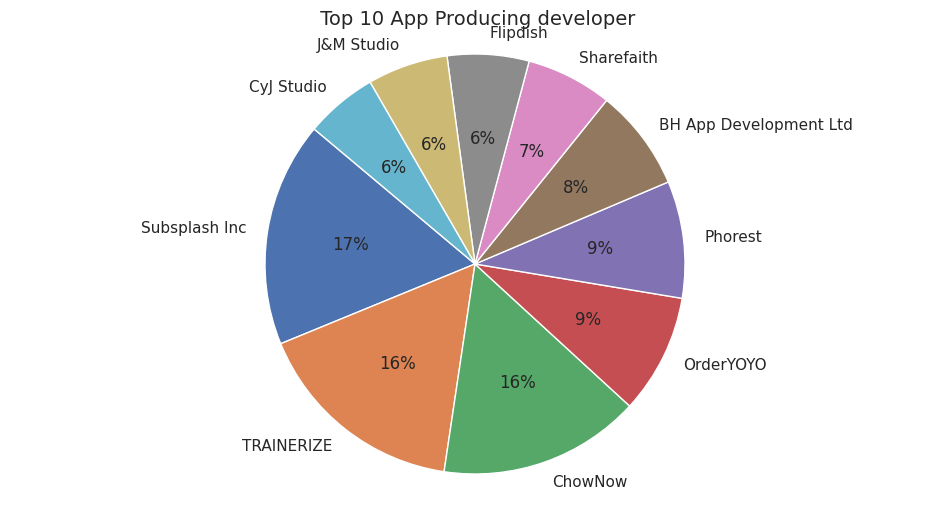

In [68]:
# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(top_10_developers, labels=top_10_developers.index, autopct='%.0f%%', startangle=140)
plt.title(" Top 10 App Producing developer", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

> **Figure 6:** A pie chart showing which Developer or company has highest app development contribution to the Play store

In [69]:
top_10_developers.head(10)

,count
Developer Id,
Subsplash Inc,5422
TRAINERIZE,5153
ChowNow,4865
OrderYOYO,2884
Phorest,2821
BH App Development Ltd,2453
Sharefaith,2076
Flipdish,1969
J&M Studio,1942


- Answer 4:
1. Subsplash Inc: 2464 apps
2. TRAINERIZE: 2339 apps
3. ChowNow: 2244 apps
4. OrderYOYO: 1289 apps
5. Phorest: 1277 apps
6. BH App Development Ltd: 1127 apps
7. Sharefaith: 933 apps
8. Flipdish: 926 apps
9. J&M Studio: 893 apps
10. CyJ Studio: 808 apps

**Question 5. What is the most common Android version among the top-rated apps?**

In [70]:
# Most common Android version among top-rated apps
top_rated_apps = df[df['Rating'] >= 4.5]
most_common_android_version = top_rated_apps.groupby('Minimum Android')['App Name'].count().idxmax()
print(f"The most common Android version among top-rated apps is: {most_common_android_version}")


The most common Android version among top-rated apps is: 4.1 and up


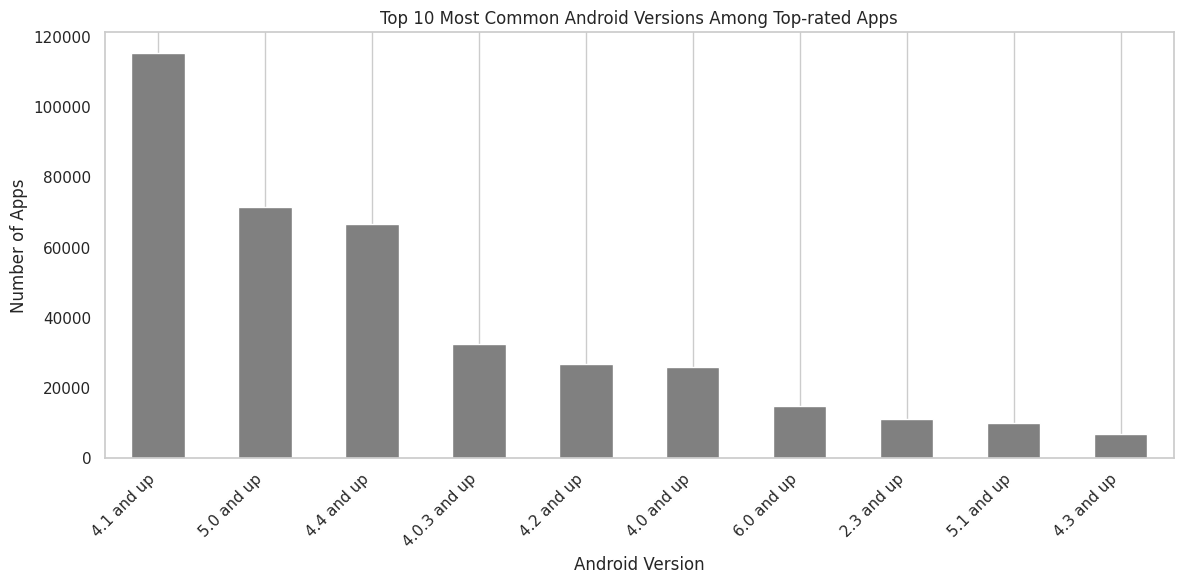

In [71]:
# Get the top 10 most common Android versions among top-rated apps
top_10_android_versions = top_rated_apps['Minimum Android'].value_counts().head(10)
# Plotting
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
top_10_android_versions.plot(kind='bar', color='grey')
plt.title('Top 10 Most Common Android Versions Among Top-rated Apps')
plt.xlabel('Android Version')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only along the y-axis
plt.tight_layout()
plt.show()


> **Figure 7:** Most Common Android Version Among Top-rated Apps

- Answer 5:The most common Android version among top-rated apps is 4.1 and up, highlighting widespread compatibility and guiding users' informed decisions.

**Question 6. What are the top 10 most installed apps?**


In [72]:
top_10_installed_apps = df.sort_values(by='Installs', ascending=False).head(10)[['App Name', 'Category']]
print(top_10_installed_apps)

                                                  App Name          Category
337866                          Samsung Experience Service             Tools
123250   Dropbox: Cloud Storage, Photo Backup, File Man...      Productivity
1845543                                           Snapchat            Social
416573                                            Briefing  News & Magazines
1702634                                         Calculator             Tools
52476                                      Samsung Gallery       Photography
741549                                    Carrier Services     Communication
15871                                        Samsung Email      Productivity
188437                                      Samsung Health  Health & Fitness
65037                                               TikTok            Social


- Answer 6:The top 10 most installed apps include Samsung Experience Service, Dropbox, Snapchat, Briefing, Calculator, Samsung Gallery and  TikTok etc based on dataset .

**Question 7. Identify the top 5 Paid Apps on the Google Play Store with the highest user ratings.**


In [73]:
# Assuming df is your DataFrame containing the Google Play Store data
top_5_paid_apps = df[df['Price'] > 0].nlargest(5, 'Rating')[['App Name', 'Rating', 'Price']]

print("Top 5 Paid Apps with Highest Ratings:")
print(top_5_paid_apps)

Top 5 Paid Apps with Highest Ratings:
                           App Name  Rating  Price
7740               Iqbaliyat (Urdu)     5.0   0.99
10966          Neo Widgets for KWGT     5.0   1.49
15119  Forest Kitten Live Wallpaper     5.0   1.99
15586                           DES     5.0   5.49
24456              Приемка квартиры     5.0   2.49


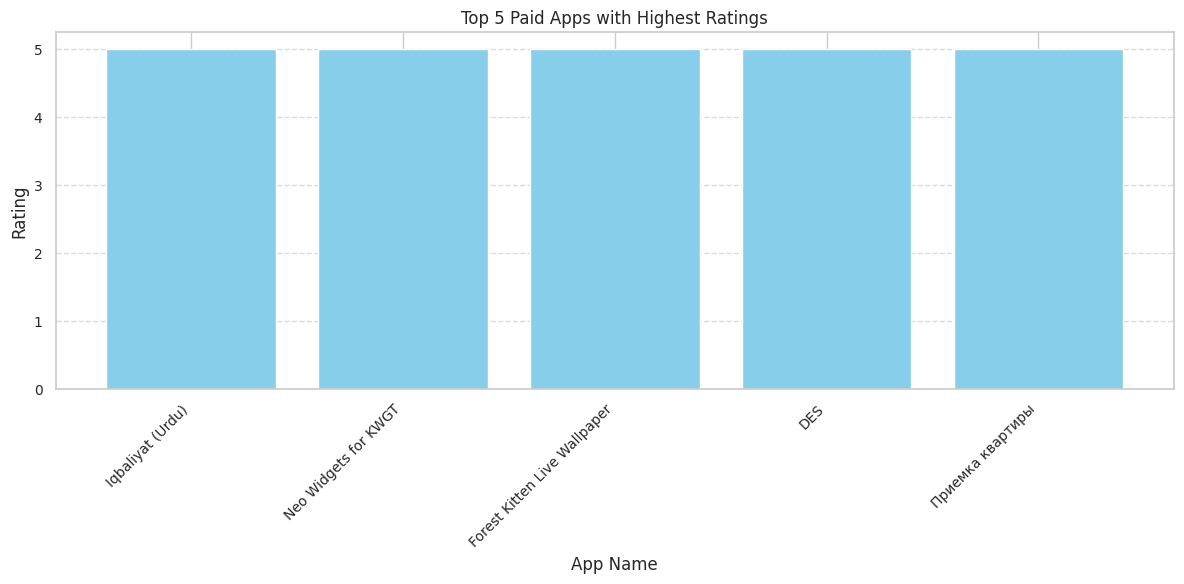

In [74]:
plt.figure(figsize=(12, 6))
plt.bar(top_5_paid_apps['App Name'], top_5_paid_apps['Rating'], color='skyblue')
plt.xlabel('App Name')
plt.ylabel('Rating')
plt.title('Top 5 Paid Apps with Highest Ratings')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines along the y-axis
plt.tight_layout()
plt.show()

> **Figure 7:**Top 5 Paid Apps with Highest Ratings

- Answer 7: The top 5 paid apps with the highest ratings are "Iqbaliyat (Urdu)", "Neo Widgets for KWGT", "Forest Kitten Live Wallpaper", "DES", and "Приемка квартиры", with ratings of 5.0, priced between $0.99 and $5.49.


**Question 8. Identify the top 5 Free Apps on the Google Play Store with the highest user ratings.**

In [75]:
# Assuming df is your DataFrame containing the Google Play Store data
top_5_free_apps = df[df['Price'] == 0].nlargest(5, 'Rating')[['App Name', 'Rating']]

print("Top 5 Free Apps with Highest Ratings:")
print(top_5_free_apps)

Top 5 Free Apps with Highest Ratings:
                                             App Name  Rating
3   Smart City Trichy Public Service Vehicles 17UC...     5.0
17                            All in one shopping app     5.0
42                           Niagara Falls Wallpapers     5.0
43                                    Extrude Balance     5.0
72                               Triple Point Academy     5.0


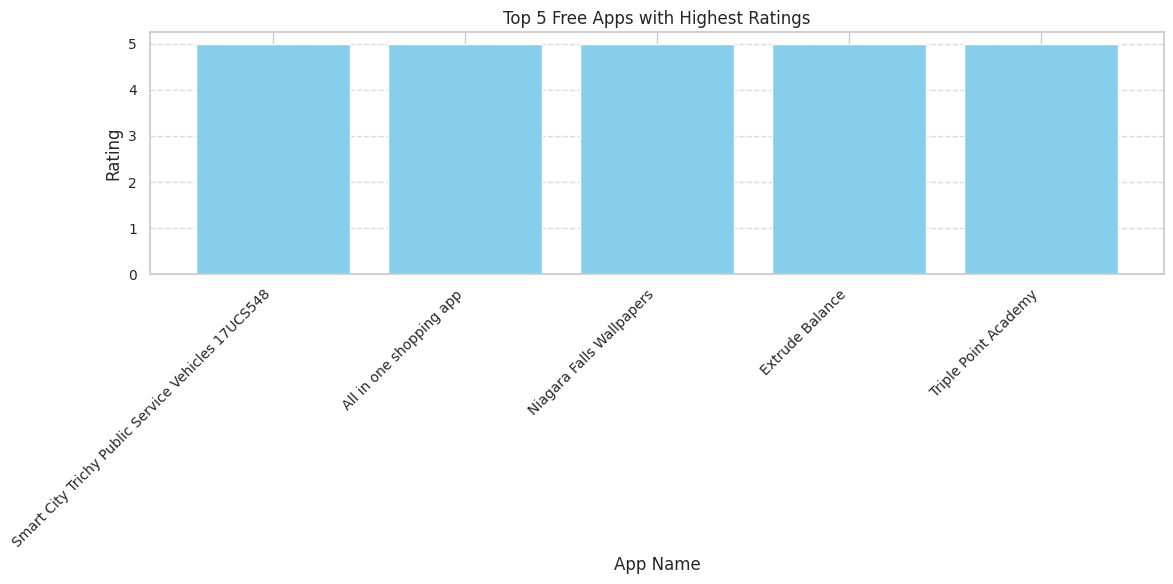

In [76]:
plt.figure(figsize=(12, 6))
plt.bar(top_5_free_apps['App Name'], top_5_free_apps['Rating'], color='skyblue')
plt.xlabel('App Name')
plt.ylabel('Rating')
plt.title('Top 5 Free Apps with Highest Ratings')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines along the y-axis
plt.tight_layout()
plt.show()

> **Figure 8:**Top 5 Free Apps with Highest Ratings

- Answer 8: The top 5 free apps with the highest ratings are "Smart City Trichy Public Service Vehicles 17UC1S058", "All in one shopping app", "Niagara Falls Wallpapers", "Extrude Balance", and "Triple Point Academy", all with a rating of 5.0.


**Question 9. Conduct a Year-on-Year comparison of apps per Content_Rating on the Google Play Store.**


In [77]:
# Assuming df is your DataFrame containing the Google Play Store data
import pandas as pd

# Extracting the year from the 'Last Updated' column
df['Year'] = pd.to_datetime(df['Last Updated']).dt.year

# Grouping the data by content rating and year, and counting the number of apps in each group
apps_per_content_rating_year = df.groupby(['Content Rating', 'Year']).size().unstack(fill_value=0)

# Displaying the result
print("Year-on-Year Comparison of Apps per Content Rating:")
print(apps_per_content_rating_year)


Year-on-Year Comparison of Apps per Content Rating:
Year            2009  2010  2011  2012  2013   2014   2015   2016    2017  \
Content Rating                                                              
Adults             0     0    15    19    58    158    400    911    1720   
Children           0     2     9    23   114    310    658   1085    2030   
Everyone          13   216   854  2219  6558  15662  34800  59231  119254   
Teen               0     4    19    45   197    603   1916   3656    7733   

Year              2018    2019    2020    2021  
Content Rating                                  
Adults            4662   10050   19348   21033  
Children          2556    6138    9357    9241  
Everyone        194040  367093  606278  547180  
Teen             15010   34903   64993   59071  


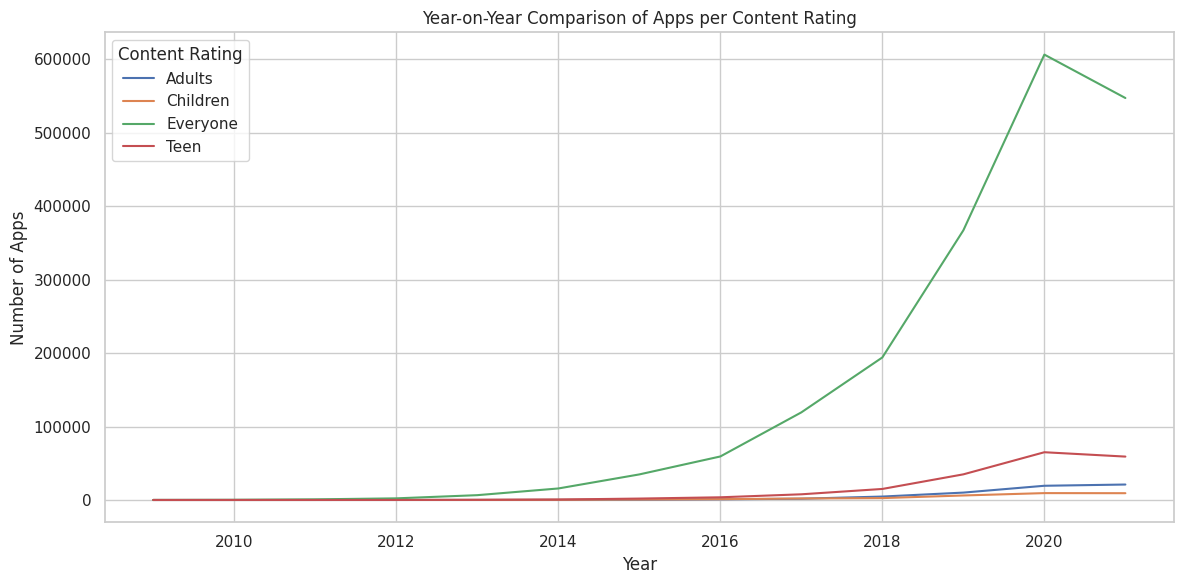

In [78]:
# Plotting the year-on-year comparison of apps per content rating
plt.figure(figsize=(12, 6))
for content_rating in apps_per_content_rating_year.index:
    plt.plot(apps_per_content_rating_year.loc[content_rating], label=content_rating)

plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.title('Year-on-Year Comparison of Apps per Content Rating')
plt.legend(title='Content Rating', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


> **Figure 9:** Portrays the growth trend of app distribution on Google Play Store across content ratings from 2009 to 2021, with "Everyone" leading followed by "Teen", "Adults", and "Children" categories.

- Answer 9: The year-on-year comparison of apps per content rating reveals a notable increase in the number of apps across all content ratings from 2009 to 2021. "Everyone" category consistently exhibits the highest number of apps, followed by "Teen", "Adults", and "Children" categories.

In [ ]:
df.columns

**Question 10. Years in which max apps were released**

In [79]:
import pandas as pd

# Assuming you have a DataFrame named df with the 'Released' column containing the release dates of the apps

# Convert 'Released' column to datetime format
df['Released'] = pd.to_datetime(df['Released'])

# Extract the release year and create a new column 'Year_Release'
df['Year_Release'] = df['Released'].dt.strftime('%Y')

# Group by 'Year_Release' and count the number of apps released in each year
cnt_year_app_Release = df.groupby('Year_Release').size().reset_index(name='Count')

# Sort the result by count in descending order and display the top 20 years
top_20_years = cnt_year_app_Release.head(20).sort_values(by='Count', ascending=False)

print(top_20_years)


   Year_Release   Count
10         2020  581262
9          2019  470474
8          2018  327197
7          2017  252744
11         2021  177604
6          2016  161471
5          2015  111094
4          2014   68459
3          2013   40047
2          2012   23960
1          2011   13106
0          2010    4027


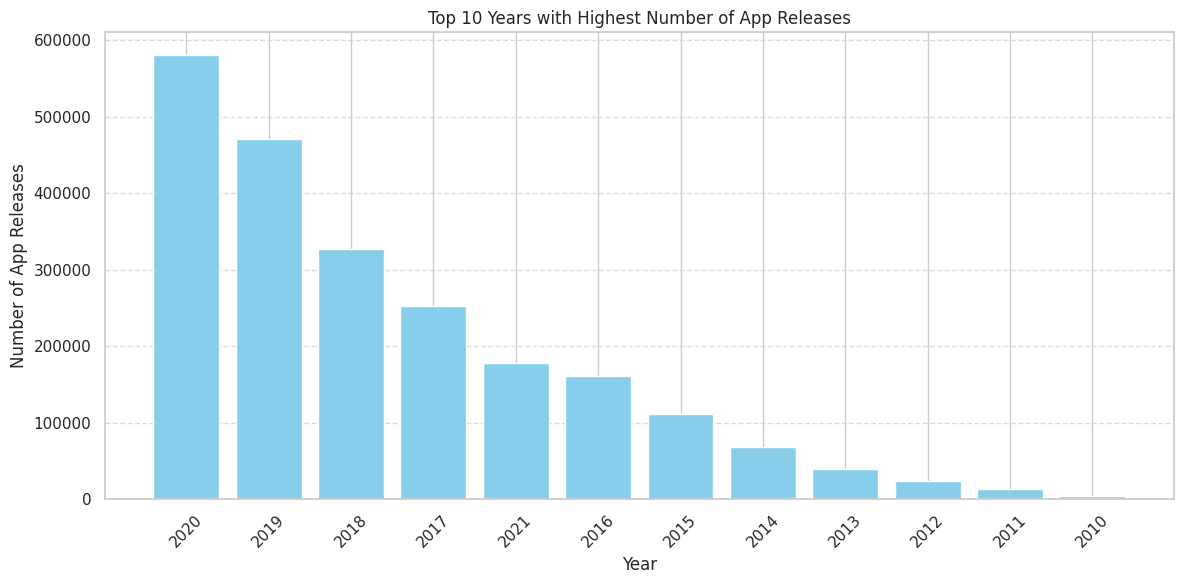

In [80]:
plt.figure(figsize=(12, 6))
plt.bar(top_20_years['Year_Release'], top_20_years['Count'], color='skyblue')
plt.title('Top 10 Years with Highest Number of App Releases')
plt.xlabel('Year')
plt.ylabel('Number of App Releases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> **Figure 10**: The maximum number of apps were released on the Play store in the year 2020

- Answer 10: In 2020, the play store saw the highest number of app releases, likely due to the COVID-19 pandemic forcing more people to stay at home during lockdowns.


**Question 11. Examine the relationship between user ratings and app prices on the Google Play Store.**

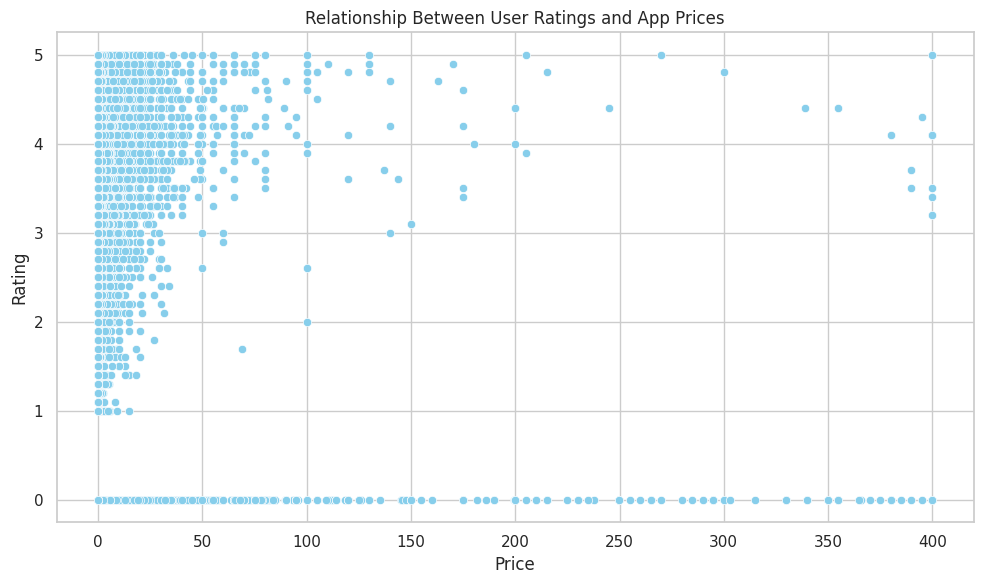

In [81]:
# Plotting the relationship between user ratings and app prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Rating', color='skyblue')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Relationship Between User Ratings and App Prices')
plt.grid(True)
plt.tight_layout()
# Save the plot as an image file
plt.savefig('user_ratings_vs_app_prices.png')
plt.show()


> **Figure 11**: Shows that Relationship Between User Ratings and App Prices

- Answer 11:
  1. The graph indicates a positive correlation between user ratings and app prices on the Google Play Store, suggesting that higher-rated apps tend to be priced higher.
  2.  However, correlation does not imply causation, as app pricing can be influenced by various factors such as development costs, features, target audience, and competition.
  2. While users may associate higher ratings with better quality, pricing decisions are multifaceted and influenced by several factors beyond ratings alone.

**Question 12. Are there any correlations between the size of the app and its rating count?**


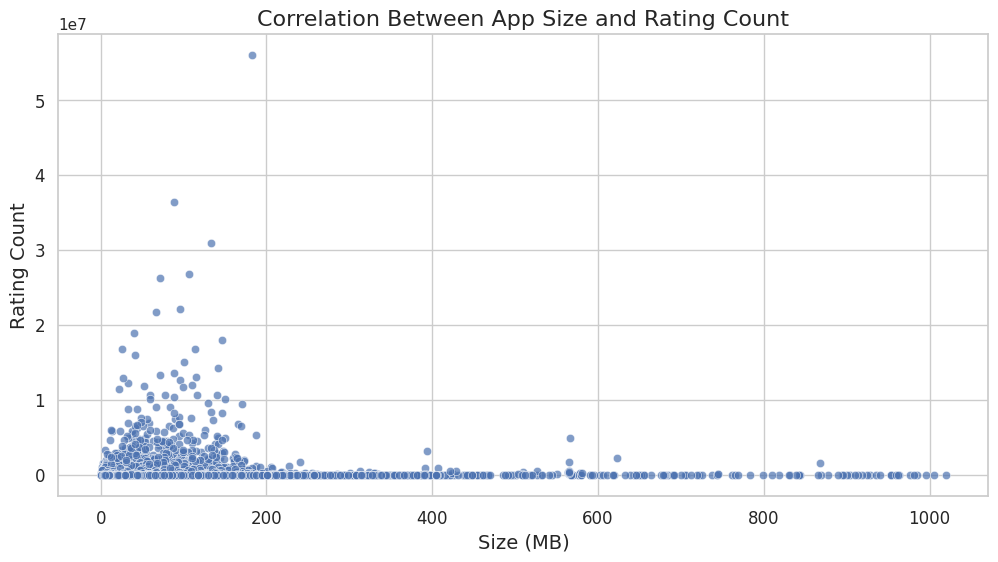

In [82]:
# Plotting the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size_in_Mb', y='Rating Count', data=df, alpha=0.7)
plt.title('Correlation Between App Size and Rating Count', fontsize=16)
plt.xlabel('Size (MB)', fontsize=14)
plt.ylabel('Rating Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Save the plot as an image
plt.savefig('app_size_vs_rating_count.png')

# Show the plot
plt.show()

> **Figure 11**: Shows that Correlation Between App Size and Rating Count

- Answer 12: The graph shows no clear correlation between the size of the app and its rating count, as the data points are scattered without a discernible trend.


**Question 13. Year on Year break down of top-5 Category based on App Price**

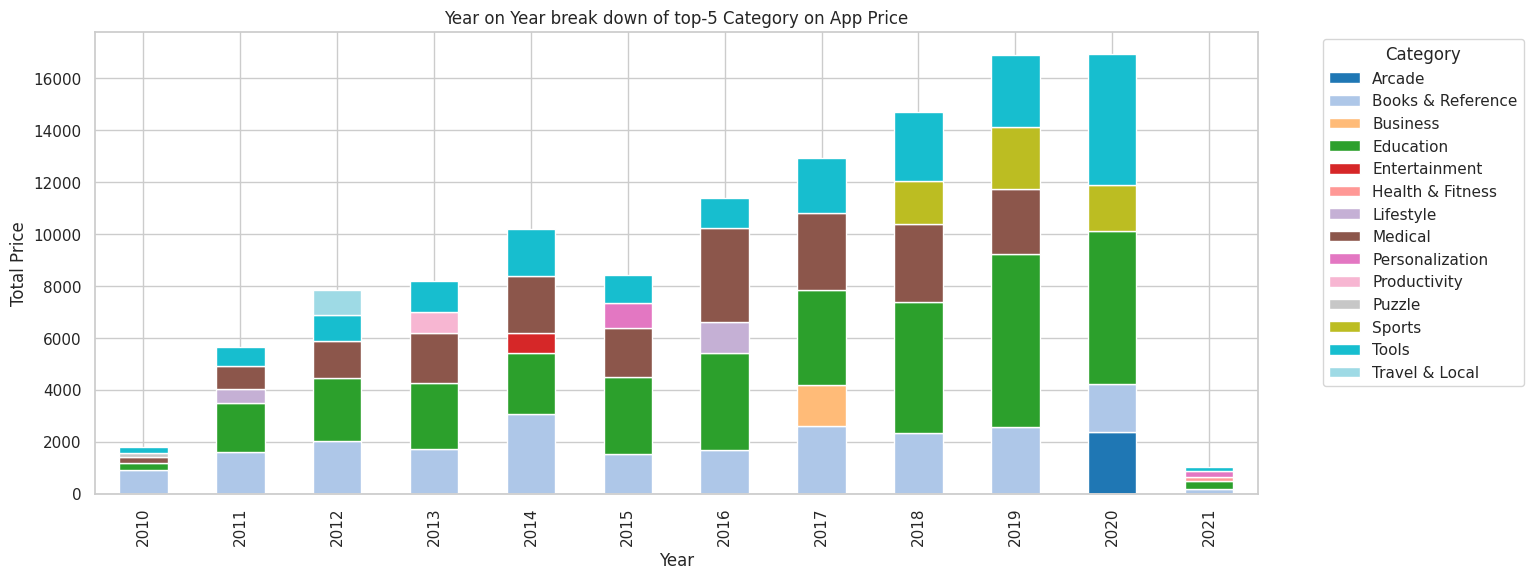

In [83]:
Rev_per_Genre = df.groupby(['Year_Release','Category' ])[['Price']].sum()


top5_genres = (Rev_per_Genre
                       .sort_values(['Year_Release', 'Price'], ascending=[True, False])
                       .groupby('Year_Release')
                       .head(5))

# Define a colormap: To present each category with a different color
cmap = plt.get_cmap('tab20')


# Group by year and primary genre, and plot a stacked bar chart
top5_genres.groupby(['Year_Release', 'Category'])['Price'].sum().unstack().plot(kind='bar', stacked=True, title= "Year on Year break down of top-5 Category on App Price", cmap=cmap)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total Price')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


> **Figure 13:** YoY break down per per Category on App price

- Answer 13: Clearly Educational apps contributes more revenue in terms of app sales

## 7.0 Summary

The exploratory data analysis (EDA) conducted on the Google Play Store dataset has revealed a plethora of insightful findings. Throughout the analysis, it was observed that the dataset maintained a commendable level of cleanliness and consistency. Moreover, it is important to note that the dataset pertains to the year 2021.

Several questions were posed to the dataset, each eliciting detailed answers and uncovering significant insights, which are summarized as follows:


Q1. What are the top 10 Categories with the highest number of installations on the Google Play Store?\
A1:
|    Category    |    Installs    |
| -------------- | -------------- |
|     Tools      | 27,301,097,507 |
|    Casual      | 14,182,166,717 |
|    Action      | 14,149,920,538 |
|    Arcade      | 13,131,824,445 |
| Entertainment  | 11,290,658,238 |
|  Productivity  | 10,590,097,186 |
|   Simulation   | 10,457,684,072 |
|    Puzzle      |  9,645,991,936 |
|   Photography  |  9,464,693,977 |
| Music & Audio  |  8,404,529,937 |

    - Tools Apps are the most downloaded apps from the store


Q2. Which category has the highest average rating?\
A2:
|         Category         |    Rating    |
| ------------------------ | ------------ |
|      Role Playing        |    3.374645  |
|          Casino          |    3.246973  |
|        Simulation        |    3.196822  |
|          Weather         |    3.075280  |
|            Card          |    3.038601  |
|          Racing          |    2.935173  |
| Video Players & Editors  |    2.882901  |
|            Word          |    2.877783  |
|         Strategy         |    2.855802  |
|          Comics          |    2.828030  |

  - Based on highest average rating the highest top 10 rated Category Role Playing , Casino, Simulation , Card , Wheather, Racing etc

Q3. What is the average price of apps in each category?\
A3: The average price of apps varies across different categories, with some categories like Medical having a significantly higher average price compared to others like Beauty, which have a much lower average price.

Q4. What are the Top 10 app producing developer?\
A4:
     **Top 10 App Producing developer**
|         Developer            |   Number of Apps   |
| ---------------------------- | ------------------ |
|       Subsplash Inc          |       2,464        |
|          TRAINERIZE          |       2,339        |
|           ChowNow            |       2,244        |
|          OrderYOYO           |       1,289        |
|            Phorest           |       1,277        |
|    BH App Development Ltd    |       1,127        |
|          Sharefaith          |        933         |
|           Flipdish           |        926         |
|           J&M Studio         |        893         |
|           CyJ Studio         |        808         |


Q5. What is the most common Android version among the top-rated apps?\
A5: The most common Android version among top-rated apps is 4.1 and up, highlighting widespread compatibility and guiding users' informed decisions.

Q6. What are the top 10 most installed apps\
A6: The top 10 most installed apps include Samsung Experience Service, Dropbox, Snapchat, Briefing, Calculator, Samsung Gallery and  TikTok etc based on dataset .

Q7. Identify the top 5 Paid Apps on the Google Play Store with the highest user ratings.\
A7:  The top 5 paid apps with the highest ratings are "Iqbaliyat (Urdu)", "Neo Widgets for KWGT", "Forest Kitten Live Wallpaper", "DES", and "Приемка квартиры", with ratings of 5.0, priced between $0.99 and $5.49.

Q8. dentify the top 5 Free Apps on the Google Play Store with the highest user ratings.\
A8:The top 5 free apps with the highest ratings are "Smart City Trichy Public Service Vehicles 17UC1S058", "All in one shopping app", "Niagara Falls Wallpapers", "Extrude Balance", and "Triple Point Academy", all with a rating of 5.0.

Q9. Conduct a Year-on-Year comparison of apps per Content_Rating on the Google Play Store.\
A9: The year-on-year comparison of apps per content rating reveals a notable increase in the number of apps across all content ratings from 2009 to 2021. "Everyone" category consistently exhibits the highest number of apps, followed by "Teen", "Adults", and "Children" categories.

Q10.Years in which max apps were released\
A10: In 2020, the play store saw the highest number of app releases, likely due to the COVID-19 pandemic forcing more people to stay at home during lockdowns.

Q11. Examine the relationship between user ratings and app prices on the Google Play Store.\
A11:
  1. The graph indicates a positive correlation between user ratings and app prices on the Google Play Store, suggesting that higher-rated apps tend to be priced higher.
  2.  However, correlation does not imply causation, as app pricing can be influenced by various factors such as development costs, features, target audience, and competition.
  2. While users may associate higher ratings with better quality, pricing decisions are multifaceted and influenced by several factors beyond ratings alone.

Q12. Are there any correlations between the size of the app and its rating count?\
A12: The graph shows no clear correlation between the size of the app and its rating count, as the data points are scattered without a discernible trend.

Q13. Year on Year break down of top-5 Genre based on App Price\
A13: Clearly Educational apps contributes more revenue in terms of app sales.


---

### Conclusion & Findings

 The primary goal of this project is to analyze the Google Play Store dataset and identify insights based on the data. By doing so, we aim to project customer dynamics and demands to developers and relevant stakeholders, helping them generate more business for their upcoming applications.


> During this EDA exercise, we have achieved several milestones:

- We have cleaned the dataset from null values.
- No duplications have been found. Although the app names have duplications, they are unique records with different versions, AppIds, and release dates.

> Our findings include:

- Educational apps contributes more revenue in terms of app sales.
- Based on highest average rating the highest top 10 rated Category Role Playing , Casino, Simulation , Card , Wheather, Racing etc
